In [1]:
#load library

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ParameterGrid, GridSearchCV

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')


In [1]:
#load file
df= pd.read_csv('source.csv')

dataframe=df.replace({'Condition':{'Normal1':0, 'Condition1':1, 'Condition5':2}})

# print dataframe size
print("Dataframe Size",  dataframe.shape)

NameError: name 'pd' is not defined

In [3]:
# create save path
path = os.getcwd()
savePath = path + '/results/'
# print(savePath)

c:\Users\royle\OneDrive\Desktop\Machine Learning\Project 1/results/


## Random Forest Classifier

In [4]:
#convert to data frame 
df_X = pd.DataFrame(dataframe.iloc[:,1:])
df_y= pd.DataFrame(dataframe.iloc[:,0])

alt_path20 = savePath + 'random_forest'
print(alt_path20)

c:\Users\royle\OneDrive\Desktop\Machine Learning\Project 1/results/random_forest


In [5]:
# Create random forest classifier object
model12 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=0, n_jobs=-1)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]


 Iteration: 1
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[9 0 1]
 [0 5 1]
 [0 0 6]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.83
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.91
RF Prediction Report 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         6

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.90        22
weighted avg       0.93      0.91      0.91        22


 Iteration: 2
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[7 3 0]
 [1 4 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.7
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.82
RF Prediction Report 
               precision    recall  f1-score   

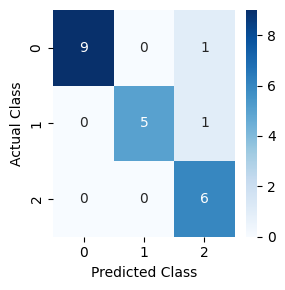

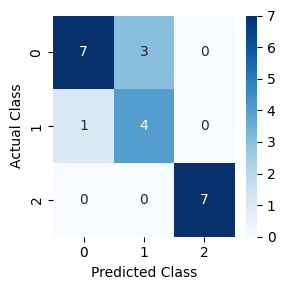

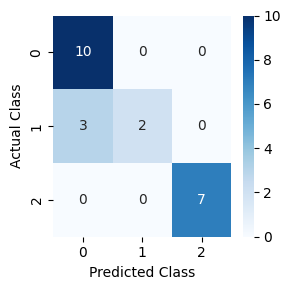

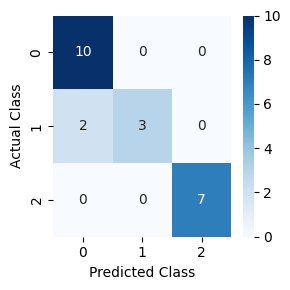

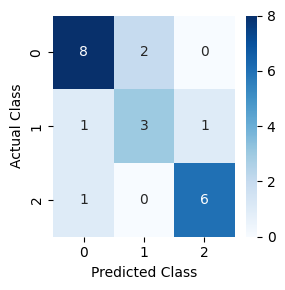

In [6]:
u = 1

for tr_i, te_i in cv.split(df_X, df_y):
    X_tr = df_X.iloc[tr_i]
    X_v = df_X.iloc[te_i]
    y_tr = df_y.iloc[tr_i]
    y_v = df_y.iloc[te_i]
    print("\n Iteration:", u)
    print("Training Data Length:", len(y_tr))
    print("Verification Data Length:", len(y_v))
    u = u + 1 
    
    # Fitting Random Forest Classification to the Training set
    model12.fit(X_tr, y_tr.values.ravel())
    y_p = model12.predict(X_v)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,y_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)
   
    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])
    
    #calculate overall accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  classification report
    print("RF Prediction Report", "\n", classification_report(y_v,y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class', ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(alt_path20 + '/' + 'injection_moulding_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    
    result_matrix.to_csv(alt_path20 + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)

In [7]:
##  Mean accuracy score Features 
model_name = 'Injection Moulding'
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.85


## Feature Importance